<a href="https://colab.research.google.com/github/BhaveshVadher1/Yulu---Hypothesis-Testing/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
from matplotlib import pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/Yulu1.csv')

**YULU**

About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India.

Problem Statement

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the
demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

- How well those variables describe the electric cycle demands

#Exploratory Data Analysis

##About given Data

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# Missing value detection
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [ ]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [ ]:
#Statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033     

###Data type analysis and conversion

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
# converting datetime from object to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [ ]:
df.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


###Analysing Independent Numerical Features by Statistical summary

In [ ]:
df1=copy.deepcopy(df)

In [ ]:
#Renaming of Categorical Variables
df1['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df1['weather'].replace({1:"Clear, Few clouds, partly cloudy",
                        2:"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
                        3:"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                        4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'},inplace=True)
df1['workingday'].replace({0:"No",1:"Yes"},inplace=True)
df1['holiday'].replace({0:"No",1:"Yes"},inplace=True)


In [ ]:
df1['season'].value_counts(normalize=True)


winter    0.251148
summer    0.251056
fall      0.251056
spring    0.246739
Name: season, dtype: float64

In [ ]:
df1['holiday'].value_counts(normalize=True)

No     0.971431
Yes    0.028569
Name: holiday, dtype: float64

In [ ]:
df1['workingday'].value_counts(normalize=True)

Yes    0.680875
No     0.319125
Name: workingday, dtype: float64

In [ ]:
df1['weather'].value_counts(normalize=True)

Clear, Few clouds, partly cloudy                                                           0.660665
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               0.260334
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    0.078909
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                 0.000092
Name: weather, dtype: float64

In [ ]:
df1['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [ ]:
df1['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [ ]:
df1['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [ ]:
df1['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [ ]:
df1['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [ ]:
df1['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

In [ ]:
df1['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

##Univariate Analysis

<Axes: xlabel='season', ylabel='count'>

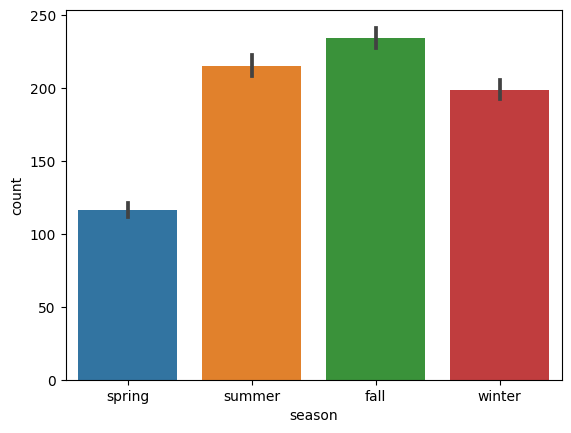

In [ ]:
sns.barplot(x='season', y='count', data=df1)

<Axes: xlabel='holiday', ylabel='count'>

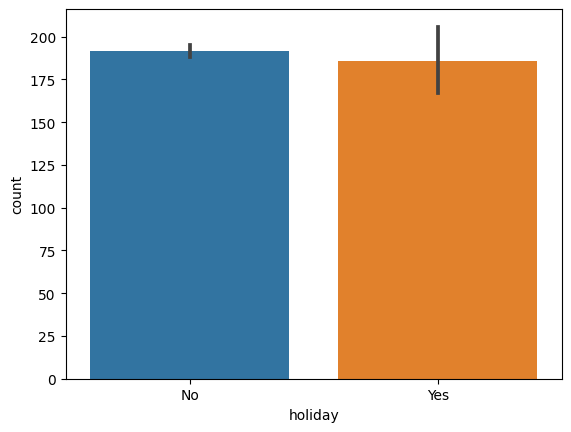

In [ ]:
sns.barplot(x='holiday', y='count', data=df1)

<Axes: xlabel='workingday', ylabel='count'>

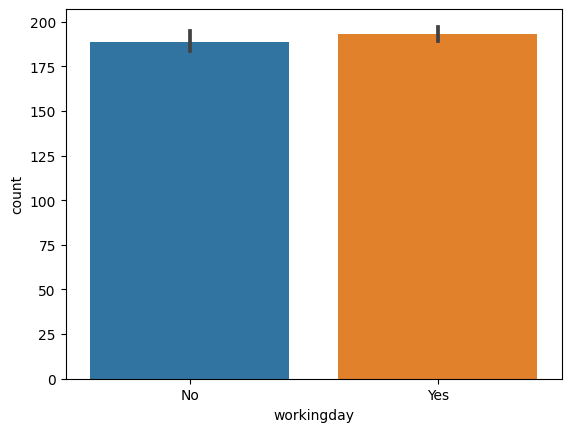

In [ ]:
sns.barplot(x='workingday', y='count', data=df1)

<Axes: xlabel='weather', ylabel='count'>

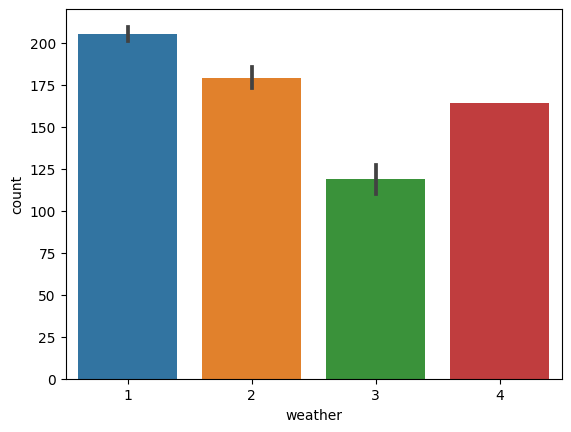

In [ ]:
sns.barplot(x='weather', y='count', data=df)

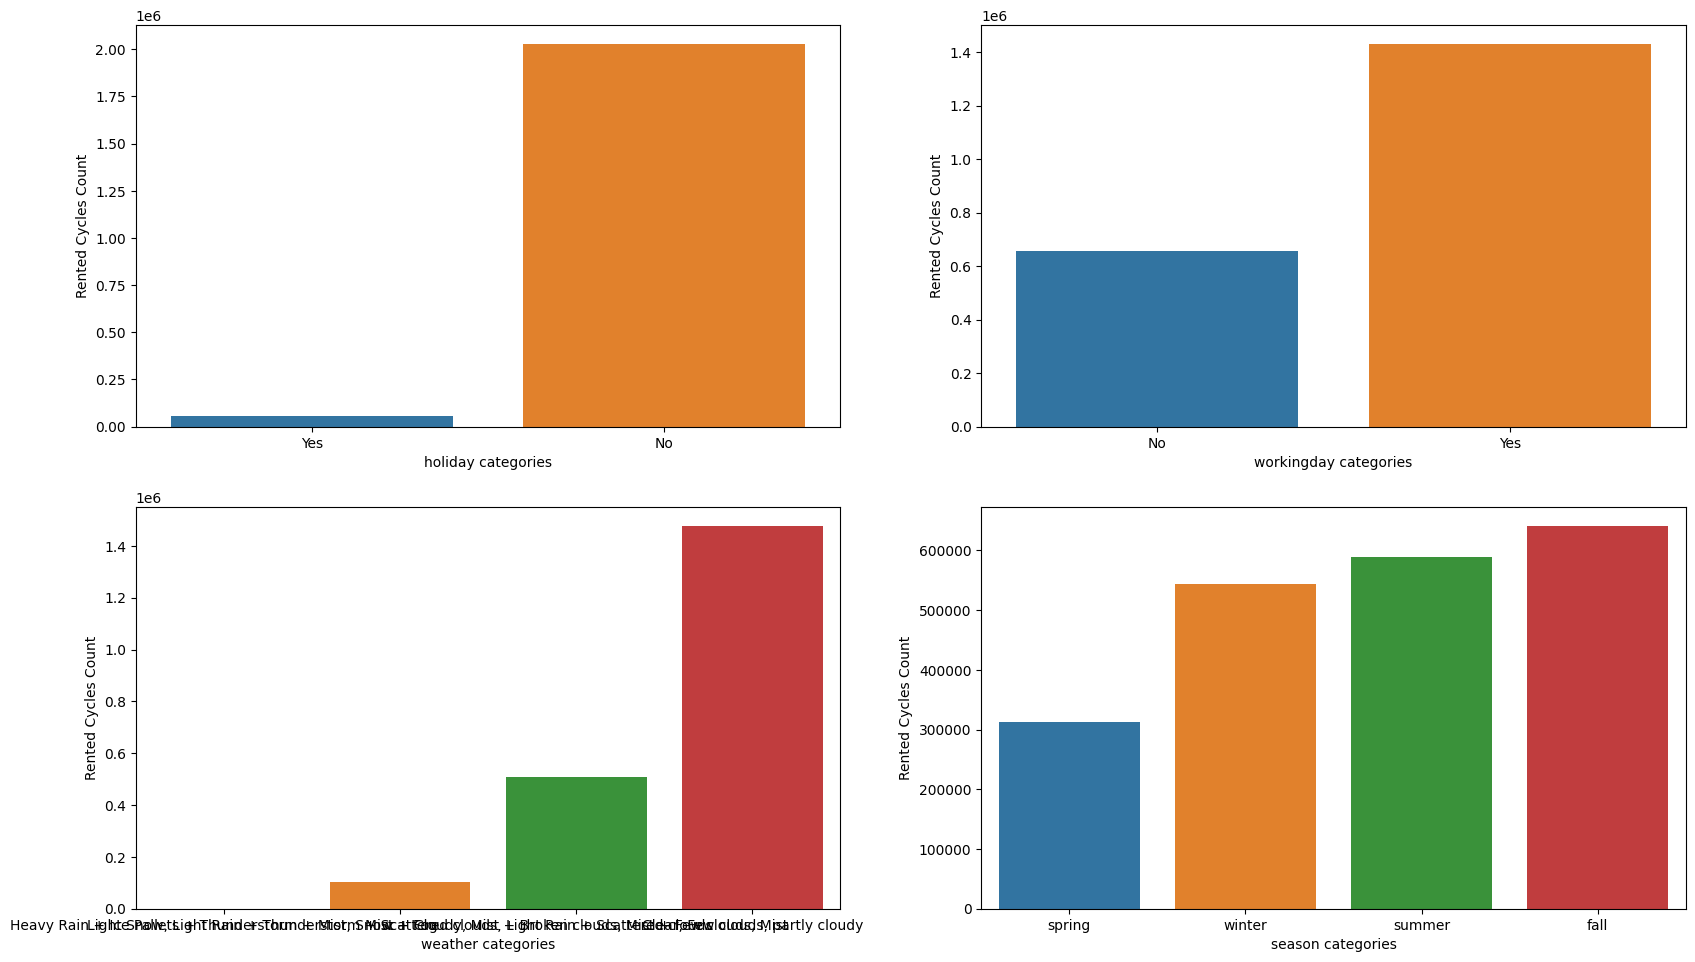

In [ ]:
# Categorical variable v/s Rented Cycles Count distribution bar plots
colnames=['holiday', 'workingday', 'weather', 'season' ]
plt.figure(figsize = (20, len(colnames)*6 ))
k=1
for colname in colnames:
  plt.subplot(len(colnames),2,k)
  s = df1.groupby(colname)['count'].sum().sort_values(ascending=True)
  g = sns.barplot(data=s, x=s.index, y=s.values )
  g.set(xticklabels=s.index)
  g.set_ylabel("Rented Cycles Count")
  g.set_xlabel(f"{colname} categories")
  k+=1


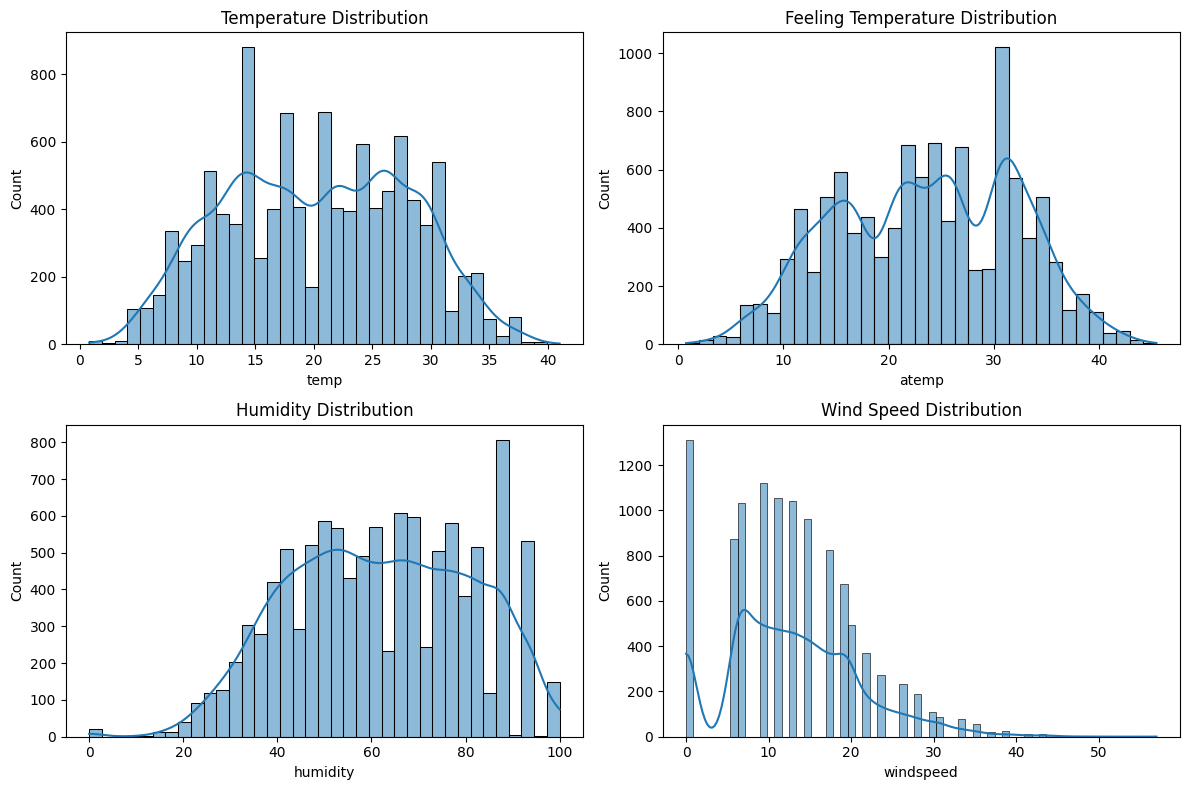

In [ ]:
# Continuous variable distribution plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['temp'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['atemp'], kde=True)
plt.title('Feeling Temperature Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['humidity'], kde=True)
plt.title('Humidity Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['windspeed'], kde=True)
plt.title('Wind Speed Distribution')

plt.tight_layout()
plt.show()

##Bivariate Analysis

In [ ]:
df.groupby(by='season')['holiday'].sum().sort_values(ascending=False)

season
3    96
4    96
1    71
2    48
Name: holiday, dtype: object

In [ ]:
df.groupby(by='season')['workingday'].sum().sort_values(ascending=False)

season
2    1893
4    1846
3    1845
1    1828
Name: workingday, dtype: object

In [ ]:
df1.groupby(by='season')['temp'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,28.789111,3.898157,15.58,26.24,28.70,31.16,41.00
spring,2686.0,12.530491,5.186492,0.82,9.02,12.30,16.40,29.52
summer,2733.0,22.823483,5.159616,9.84,18.86,22.96,26.24,38.54
winter,2734.0,16.649239,4.742176,5.74,13.12,16.40,20.50,30.34


In [ ]:
df1.groupby(by='season')['atemp'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,32.540783,4.594888,12.120,30.305,33.335,35.605,45.455
spring,2686.0,15.228956,6.092218,0.760,10.605,14.395,20.455,32.575
summer,2733.0,26.647098,5.491321,11.365,22.725,26.515,31.060,43.940
winter,2734.0,20.059909,5.264197,7.575,15.910,20.455,24.240,34.090


In [ ]:
df1.groupby(by='season')['humidity'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,64.123674,17.217859,17.0,51.0,66.0,78.0,100.0
spring,2686.0,56.297841,20.158420,0.0,41.0,53.0,70.0,100.0
summer,2733.0,60.852909,20.179655,16.0,45.0,61.0,78.0,100.0
winter,2734.0,66.173738,17.813446,16.0,52.0,66.0,81.0,100.0


In [ ]:
df1.groupby(by='season')['windspeed'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,11.508862,7.160605,0.0,7.0015,11.0014,15.0013,56.9969
spring,2686.0,14.636978,9.150257,0.0,7.0015,12.9980,19.9995,51.9987
summer,2733.0,13.405607,7.992956,0.0,7.0015,12.9980,19.0012,47.9988
winter,2734.0,11.678147,7.842632,0.0,7.0015,11.0014,16.9979,43.0006


In [ ]:
df1.groupby(by='season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [ ]:
df1.groupby(by='weather')['temp'].mean()

weather
Clear, Few clouds, partly cloudy                                                           20.557122
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                  8.200000
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    19.546356
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               19.614608
Name: temp, dtype: float64

In [ ]:
df1.groupby(by='weather')['atemp'].mean()

weather
Clear, Few clouds, partly cloudy                                                           23.994126
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                 11.365000
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    22.753091
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               23.072414
Name: atemp, dtype: float64

In [ ]:
df1.groupby(by='weather')['windspeed'].mean()

weather
Clear, Few clouds, partly cloudy                                                           12.892542
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                  6.003200
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    14.071248
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               12.179905
Name: windspeed, dtype: float64

In [ ]:
df1.groupby(by='weather')['humidity'].mean()

weather
Clear, Few clouds, partly cloudy                                                           56.716769
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                 86.000000
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    81.341094
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               69.100565
Name: humidity, dtype: float64

In [ ]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['extreme_cold', 'cold', 'moderate', 'hot', 'extreme_hot']
df['temp_bin'] = pd.cut(df1['temp'], bins=bins, labels=labels)
df.groupby(by='temp_bin')['count'].sum().sort_values(ascending=False)

temp_bin
moderate        968265
cold            609233
hot             415543
extreme_cold     92141
extreme_hot        294
Name: count, dtype: int64

In [ ]:
df1.groupby(by='temp_bin')['registered'].sum().sort_values(ascending=False)

KeyError: ignored

##Corelation

In [ ]:
df1.hist(bins=20,figsize=(20,15),color='grey')
plt.show()

In [ ]:
plt.figure(figsize=(22,9))
sns.heatmap(df1.corr(), annot=True, xticklabels=1, yticklabels=1)
plt.show()

#Hypothesis Testing

##2- Sample T-Test

In [ ]:
#Visual Analysis:
# Distribution of the number of electric cycles rented on working days and non-working days.

# Visual analysis - Barplot of 'workingday' vs 'count'
plt.figure(figsize=(6, 4))
sns.barplot(data=df1, x='workingday', y='count')
plt.title('Working Day vs. Electric Cycle Rentals')
plt.xlabel('Working Day')
plt.ylabel('Number of Electric Cycle Rentals')
plt.show()

###Validating Test Assumption

Hypothesis Formulation:

Null Hypothesis (H0): The average number of electric cycles rented on working days is equal to the average number of electric cycles rented on non-working days.

Alternative Hypothesis (Ha): The average number of electric cycles rented on working days is different from the average number of electric cycles rented on non-working days.

Appropriate Test:
We will use a 2-sample independent t-test to compare the means of the two groups (working days and non-working days) to determine if there is a significant difference in the average number of electric cycles rented.

Test Assumptions:

Independence: The samples for working days and non-working days are assumed to be independent.

Normality: The data for both groups should approximately follow a normal distribution.

Equal Variance: The variance of the two groups should be approximately equal.

In [ ]:
from scipy.stats import shapiro, levene

# Separate data for working days and non-working days
workingday_data = df[df['workingday'] == 1]['count']
non_workingday_data = df[df['workingday'] == 0]['count']

# Check Normality using Shapiro-Wilk test
_, p_value_wd = shapiro(workingday_data)
_, p_value_nwd = shapiro(non_workingday_data)

print("Shapiro-Wilk Normality Test - Working Day:")
print("P-Value:", p_value_wd)

print("\nShapiro-Wilk Normality Test - Non-Working Day:")
print("P-Value:", p_value_nwd)

# Check Equal Variance using Levene's test
_, p_value_levene = levene(workingday_data, non_workingday_data)

print("\nLevene's Test Result:")
print("P-Value:", p_value_levene)

**Conclution of Shapiro-Wilk normality test :**

Null Hypothesis (Ho)=the sample comes from a normal distribution

Alternate hypothesis(Ha)=the sample does not comes from a normal distribution

Since P value (4.20e-45) < 0.05, 95% Significance level,
We reject the Null hypothesis and accept the alternate hypothesis i.e.

**These two samples are not from normal drstibution**

**Conclution of Levene's test of Variance:**

Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous variance

Since P value (0.94) > 0.05, Signoficance level
We fail to reject Null hypothesis.

**Variance of these two samples is similar**

In [ ]:
#2-sample t-test
t_statistic, p_value = ttest_ind(workingday_data, non_workingday_data)

print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

**Conclution of 2sample T test**

Null Hypothesis (H0): The average number of electric cycles rented on working days is equal to the average number of electric cycles rented on non-working days.

Alternative Hypothesis (Ha): The average number of electric cycles rented on working days is different from the average number of electric cycles rented on non-working days.

Since the P Value(0.22) > Significance level = 0.05,

**We Fail to reject the Null Hypothesis**

##ANOVA

###Anova for Weather

ANOVA for Weather:

Null Hypothesis (H0): The mean number of electric cycles rented is the same across different weather conditions.

H0: μ_weather1 = μ_weather2 = μ_weather3 = μ_weather4

Alternative Hypothesis (Ha): The mean number of electric cycles rented is different for at least one pair of weather conditions.

Ha: At least one of the weather condition means is different from the others.


####Validating Test assumptions

**Assumptions for ANOVA:**

Independence: The samples for each category (weather and season) are assumed to be independent.

Normality: The data for each category should approximately follow a normal distribution.

Homogeneity of Variance: The variance of the number of cycles rented should be approximately equal across different categories (weather and season).

In [ ]:
import seaborn as sns
from scipy.stats import f_oneway, shapiro, levene

# Check Normality for each weather condition
for weather_condition in df['weather'].unique():
    data = df[df['weather'] == weather_condition]['count']
    if len(data) >= 3:
        _, p_value = shapiro(data)
        print(f"Shapiro-Wilk Normality Test - Weather {weather_condition}:")
        print("P-Value:", p_value)
    else:
        print(f"Insufficient data points for Weather {weather_condition}. Skipping Shapiro-Wilk test.")

    # Visualization - Histogram for each weather condition
    plt.figure()
    sns.histplot(data, kde=True)
    plt.title(f'Histogram - Weather {weather_condition}')
    plt.xlabel('Number of Electric Cycles Rented')
    plt.show()


**Conclusion of Shapiro-Wilk Normality test:**

Null Hypothesis (Ho)=the sample comes from a normal distribution

Alternate hypothesis(Ha)=the sample does not comes from a normal distribution

Since p-values from the Shapiro-Wilk test << α (α = 0.05) for weather, we reject the null hypothesis and conclude

**These sample does not comes from normal dristribution**

In [ ]:
# Check Equal Variance using Levene's test for Weather
weather_data = [df[df['weather'] == weather_condition]['count'] for weather_condition in df['weather'].unique()]
_, p_value_weather = levene(*weather_data)

print("\nLevene's Test Result - Weather:")
print("P-Value:", p_value_weather)

**Conclution of Levene's test of Variance:**

Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous variance

Since P value (3.50e-35) < 0.05, Signoficance level
We reject Null hypothesis.

In [ ]:
# ANOVA for Weather
from scipy.stats import f_oneway
import scipy.stats as stats

weather1 = df[df['weather']==1]['count']
weather2 = df[df['weather']==2]['count']
weather3 = df[df['weather']==3]['count']

stat,p = stats.f_oneway(weather1, weather2, weather3)
print('P-value :',p)

**Conclusion of Anova for weather:**

Null Hypothesis (H0): The mean number of electric cycles rented is the same across different weather conditions.

H0: μ_weather1 = μ_weather2 = μ_weather3 = μ_weather4

Alternative Hypothesis (Ha): The mean number of electric cycles rented is different for at least one pair of weather conditions.

Ha: At least one of the weather condition means is different from the others.
Since the P Value(4.97e-43) << Significance level = 0.05,

**We reject the Null Hypothesis**

**We reject null hypothesis, which means the number of electric cycles rented on different weather are different**

###Anova for Season

Null Hypothesis (H0): The mean number of electric cycles rented is the same across different seasons.

H0: μ_season1 = μ_season2 = μ_season3 = μ_season4

Alternative Hypothesis (Ha): The mean number of electric cycles rented is different for at least one pair of seasons.

Ha: At least one of the season means is different from the others.

####Validating Test assumptions

**Assumptions for ANOVA:**

Independence: The samples for each category (weather and season) are assumed to be independent.

Normality: The data for each category should approximately follow a normal distribution.

Homogeneity of Variance: The variance of the number of cycles rented should be approximately equal across different categories (weather and season).

In [ ]:
# Check Normality for each season
for season in df['season'].unique():
    data = df[df['season'] == season]['count']
    if len(data) >= 3:
        _, p_value = shapiro(data)
        print(f"\nShapiro-Wilk Normality Test - Season {season}:")
        print("P-Value:", p_value)
    else:
        print(f"\nInsufficient data points for Season {season}. Skipping Shapiro-Wilk test.")

    # Visualization - Histogram for each season
    plt.figure()
    sns.histplot(data, kde=True)
    plt.title(f'Histogram - Season {season}')
    plt.xlabel('Number of Electric Cycles Rented')
    plt.show()

**Conclusion of Shapiro-Wilk Normality test:**

Null Hypothesis (Ho)=the sample comes from a normal distribution

Alternate hypothesis(Ha)=the sample does not comes from a normal distribution

Since p-values from the Shapiro-Wilk test << α (α = 0.05) for weather, we reject the null hypothesis and conclude

**These sample does not comes from normal dristribution**

In [ ]:
# Check Equal Variance using Levene's test for Season
season_data = [df[df['season'] == season]['count'] for season in df['season'].unique()]
_, p_value_season = levene(*season_data)

print("\nLevene's Test Result - Season:")
print("P-Value:", p_value_season)

**Conclution of Levene's test of Variance:**

Null Hypothesis(H0) - Homogenous Variance

Alternate Hypothesis(HA) - Non Homogenous variance

Since P value (1.01e-118) < 0.05, Signoficance level
We reject Null hypothesis.

In [ ]:
#Anova for Season
from scipy.stats import f_oneway
import scipy.stats as stats

season1 = df[df['season']==1]['count']
season2 = df[df['season']==2]['count']
season3 = df[df['season']==3]['count']
season4 = df[df['season']==4]['count']

stat,p = stats.f_oneway(season1, season2, season3, season4)
print('P-value :',p)

**Conclusion of Anova for Season:**

Null Hypothesis (H0): The mean number of electric cycles rented is the same across different seasons.

H0: μ_season1 = μ_season2 = μ_season3 = μ_season4

Alternative Hypothesis (Ha): The mean number of electric cycles rented is different for at least one pair of seasons.

Ha: At least one of the season means is different from the others.

Since the P Value(6.16e-149) << Significance level = 0.05,

**We reject the Null Hypothesis**

**We reject null hypothesis, which means the number of electric cycles rented on different seasons are different**

##Chi-Square

**Hypothesis Formulation**

Null Hypothesis (H0): The weather condition is independent of the season.

H0: Weather and Season are independent.

Alternative Hypothesis (Ha): The weather condition is dependent on the season.

Ha: Weather and Season are not independent.

#### Validating Test assumptions

**Assumptions of Chi square Test**

1) The data in the cells should be frequencies, or counts of cases rather than percentages or some other transformation of the data.

2) The levels (or categories) of the variables are mutually exclusive.

3) The study groups must be independent. This means that a different test must be used if the two groups are related.

4) The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one.

In [ ]:
from scipy.stats.contingency import chi2_contingency
plt.figure(figsize=(18, 5))
contingency_table = pd.crosstab(df['season'], df['weather'])
values = np.array([contingency_table.iloc[0][:4], contingency_table.iloc[1][:4], contingency_table.iloc[2][:4]])
sns.heatmap(contingency_table, annot=True, fmt='.6g')
plt.show()

In [ ]:
chi2_stat, p_value, dof, expected_values = chi2_contingency(values)
print(f"Chi2-test statistic is {chi2_stat} and p_value is {p_value}")

**Conclusion of Chisquare Test:**

Null Hypothesis (H0): The weather condition is independent of the season.

H0: Weather and Season are independent.

Alternative Hypothesis (Ha): The weather condition is dependent on the season.

Ha: Weather and Season are not independent.

Since P Value (0.0007) < 0.05, 95% significance level we will reject Null hypothesis and conclude:

 **the season has impact on the weather or they are dependent.**

#Insights


### from value counts
* Datetime: Count of cycle rented and weather conditions data of approx 10.8K hours spread over a span of 2 years recorded.
* Season: We have 4 seasons, equally distributed.
workingday: 68% of these hours have been recorded from working days and 31% from non working days.
* weather: weather -1 which is-> Clear, Few clouds, partly cloudy, partly cloudy is the most frequently occuring weather, followed by weather -2. out of these 10.8K hours, only 1 hour recorded a weather of category 4.
* Temp: The mean temperature is 20.23 degrees, maximum temp climbing upto 41 degrees and minimum being 0.82 degrees.
* Atemp: The mean temperature felt is 23.65 degrees, maximum temp climbing upto 45 degrees and minimum being 0.7 degrees.
* Humidity: The mean humidity is 61 g/m^3, maximum humidity climbing upto 100 g/m^3 and minimum being 0 g/m^3.
* Windspeed: The 25 percentile to 75 percentile windspeed is between 7km/hr and 17km/hr.
* Casual: average count of casual users on a hourly basis is 36 users. maximum casual users recorded in an hour is 367 and minimum is 0.
* Registered: average count of registered users on an hourly basis is 155 users. maximum registered users in an hour is 886 and minimum is zero.
* Count: average count of total rental bikes including both casual and registered on an hourly basis is 191.

###from statistical analysis
*  clear skies,Partly cloudy collects 66% of the data points, while mist or cloudy collects 26% of the data points.
*  Very few data points are collected during light snow or light rain conditions; probably a lot of people don't use the service during heavy rain or thunder storms, which makes absolute sense.
*  The average temperature was 20.23 degrees Celsius, with 20.5 happening 50% of the time.
*  The maximum temperature is recorded at 41, and the minimum temperature is recorded at 0.82 degrees Celsius.
*  The average wind speed was 12.8, with 12.998 happening 50% of the time.
*  The maximum wind speed was 56.996, and the minimum wind speed was recorded at 0.
*  The average humidity was 61.886%, with 62.8% of humidity happening 50% of the time.
*  The maximum humidity was 100%, while the minimum humidity was 0%.
*  The average number of casual users is 36.02, with 17 causal users being 50%.
*  The maximum number of casual users is 367, and the minimum number of users is zero.
*  The average number of registered users is 155.52, with 118 users 50% of the time.
*  The maximum and minimum number of registered users are 886 and 0, respectively.

###From Univariate and Bivariate analysis
*  The maximum number of holidays can be seen during the fall and winter season.
*  While spring has moderate number of holidays, the least number of holidays are in the summer season.
*  The maximum number of working days happens in the summer, followed by the winter.
*  The least number of working days happens in the fall.
*  During spring, the average temperature is recorded as 12.53 degrees Celsius, the median temperature is 12.30, and the maximum and minimum temperatures are 29.52 and 0.82, respectively.
*  In the summer season, the average temperature is recorded at 22.82 degrees Celsius, the median temperature is 22.96, and the maximum and minimum temperatures are 38.54 and 9.82, respectively.
*  In the fall season, the average temperature is recorded at 15.58 degrees Celsius, the median temperature is 28.70, and the maximum and minimum temperatures are 41 and 15.58, respectively.
*  In the winter season, the average temperature is recorded at 28.79 degrees Celsius, the median temperature is 28.70, and the maximum and minimum temperatures are 41 and 28.79, respectively.
*  During spring, the average humidity is recorded at 56.29, the median humidity is 53, and the maximum and minimum are 100 and 0.0, respectively.
*  In the summer season, the average humidity is recorded at 60.85, the median humidity is 61, and the maximum and minimum are 100 and 16.0, respectively.
*  In the fall season, the average humidity is recorded at 66, the median humidity is 66, and the maximum and minimum are 100 and 17, respectively.
*  In the winter season, the average humidity is recorded at 66.17, the median humidity is 66 and the maximum and minimum are 100 and 16, respectively.
*  In the year 2011, the average number of total users was 144, with a huge standard deviation of 133, a median of 111, and a maximum and minimum count of 638 and 1, respectively.
*  In the year 2012, the average number of total users was 238.56, with a huge standard deviation of 208, a median of 199, and a maximum and minimum count of 977 and 1, respectively.
* In the year 2011, the average number of registered users was 115.45, with a huge standard deviation of 108, a median of 91, and a maximum and minimum registered count of 567 and 0, respectively.
*  In the year 2012, the average number of total users was 195.31, with a huge standard deviation of 174.74, a median of 161, and a maximum and minimum registered count of 886 and 1, respectively.



###from Hypothesis testing

By performing a 2-sample T-test on working and non-working days with respect to count, we can infer that the population count means of both categories are the same.

By performing an ANOVA test on different seasons with respect to count, we can infer that population count means under different seasons are not the same, meaning there is a difference in the usage of Yulu bikes in different seasons.

By performing an ANOVA test on different weather conditions except 4 with respect to count, we can infer that population count means under different weather conditions are the same, meaning there is a difference in the usage of Yulu bikes in different weather conditions.

By performing a Chi2 test on season and weather (categorical variables), we can infer that there is an impact on weather dependent on season.

The median temperature is noted at 20.5 degrees Celsius, while 75% of the data has been recorded at 26.24 degrees Celsius. The average temperature is noted as 20.36 degrees Celsius.

The Yulu has a median of 145 counted (casual + registered) users, with 75% of users totaling 284. The average number of counted users is 191.574. The maximum number of counted users is 977.

68% of the data points are collected for the working day, which makes sense as a lot of people use public transportation on working days.

Very few data points are collected during light snow or light rain conditions; probably a lot of people don't use the service during heavy rain or thunder storms, which makes absolute sense.

The average temperature was 20.23 degrees Celsius, with 20.5 happening 50% of the time.

10. The maximum number of holidays can be seen during the fall and winter seasons.

11. In the year 2011, the average number of total users was 144, with a huge standard deviation of 133, a median of 111, and a maximum and minimum count of 638 and 1, respectively. In the year 2012, the average number of total users was 238.56, with a huge standard deviation of 208, a median of 199, and a maximum and minimum count of 977 and 1, respectively.

In October, the average number of total users was 228, with a standard deviation of 204, a median of 180, and a maximum and minimum count of 948 and 1, respectively.

There is a strong positive correlation between casual and count, and a very high correlation between registered and counted users.

14. The median difference between a working day and a non-working day is only marginally significant.

15. The total demand curve is increasing from clear skies to cloudy mist and is reduced in light snow or light rain.